**Import library**

In [1]:
!nvidia-smi

Thu Dec 15 18:29:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 1.5 MB/s 
     |████████████████████████████████| 981 kB 54.0 MB/s 
     |████████████████████████████████| 265 kB 60.7 MB/s 
     |████████████████████████████████| 3.8 MB 64.4 MB/s 
     |████████████████████████████████| 1.3 MB 83.0 MB/s 
     |████████████████████████████████| 468 kB 54.8 MB/s 
     |████████████████████████████████| 880 kB 60.8 MB/s 
     |████████████████████████████████| 7.6 MB 63.8 MB/s 
     |████████████████████████████████| 182 kB 62.6 MB/s 
  Created wheel for ktrain: filename=ktrain-0.32.3-py3-none-any.whl size=25313585 sha256=29cca68df8f16cab77d3cbfc25030483cae660bd58d5b4015dc7497c9d54e568
  Stored in directory: /root/.cache/pip/wheels/c4/a0/4b/38365824295b72c59f340fce7927cdb5438d2705f5dbbe47b7
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33516 sha256=20057872f87757be514882f9

In [3]:
!pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 5.1 MB/s 


In [4]:
import tensorflow as tf

from pythainlp.tokenize import word_tokenize, Tokenizer

import numpy as np
import pandas as pd 

import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

from pythainlp.corpus.common import thai_words
from pythainlp.corpus import thai_stopwords

import seaborn as sn
import matplotlib.pyplot as plt

import pickle as p
import plotly
import plotly.graph_objs as go

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from ktrain import text
import ktrain

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Define constant value for model**

In [5]:
# EPOCHS = 100
# BS = 32
# DIMENSION = 100

**Read data from each dataset**

In [6]:
df_kplus = pd.read_csv('/content/KPlus_Googleplay.csv')
df_scb = pd.read_csv('/content/SCB_Easy_Googleplay_cut.csv')
df_ktb = pd.read_csv('/content/Krungthai_next_Googleplay.csv')

**Remove some column from Kplus dataset**

In [7]:
df_kplus.head(4)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Class
0,9f20248d-8b73-408e-8e06-5556e5e342ad,นายมงคล เขียวบุญแย้ม,https://play-lh.googleusercontent.com/a/ALm5wu...,ชอบแอบนี้มากๆ5.5,5,0,NaN,2022-11-12 06:13:13,ขอขอบคุณ ที่ไว้วางใจใช้บริการ K PLUS ของธนาคาร...,2022-11-12 13:47:24,pos
1,864104fc-01d0-4a44-835d-f1ae41031bfd,Punpun aoorza Goodnow,https://play-lh.googleusercontent.com/a-/ACNPE...,ใช้มาตลอดพออัพเดทล่าสุดนี่เข้าไม่ได้เลยและเด้ง...,2,0,5.16.3,2022-11-12 06:07:28,ขออภัยในความไม่สะดวกที่ได้รับค่ะ เบื้องต้นรบกว...,2022-11-12 13:47:10,neg
2,8f8e9708-35aa-425d-b044-17acfa120fa2,PalmZer Ch,https://play-lh.googleusercontent.com/a-/ACNPE...,ช่วงนี้แอปชอบเปิดเอง ทั้งๆที่ไม่ได้ใช้ ขึ้นมาข...,3,0,5.16.3,2022-11-12 04:54:49,ขออภัยในความไม่สะดวกที่ได้รับนะคะ หากพบปัญหากา...,2022-11-12 16:28:57,neg
3,1225a715-8ad3-4093-90b8-71b3eeaeb7c7,ปรินทร์พร ทิพย์สุวรรณ,https://play-lh.googleusercontent.com/a-/ACNPE...,ช่วงนี้แอฟเด้งมาบ่อยเลยค่ะ ในขณะที่ใช้แอฟอื่นอ...,2,0,5.16.3,2022-11-12 04:39:23,ขออภัยในความไม่สะดวกที่ได้รับนะคะ เบื้องต้นรบก...,2022-11-12 16:28:47,neg


In [8]:
df_kplus.rename(columns = {'at':'timestamp', 'Class':'class'}, inplace = True)
kplus_remove_columns = ['reviewId', 'userName','userImage','replyContent','repliedAt']
df_kplus.drop(kplus_remove_columns, axis=1, inplace=True)

In [9]:
df_kplus.columns

Index(['content', 'score', 'thumbsUpCount', 'reviewCreatedVersion',
       'timestamp', 'class'],
      dtype='object')

**Remove some column from SCB dataset**

In [10]:
df_scb.head(4)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Score
0,bb808b6e-7b5f-4708-9cf0-cce451e6b78b,ใหม ใหม่,https://play-lh.googleusercontent.com/a-/ACNPE...,ขยันอัปเดตจัง แต่!!ไม่มีอะไรดีขึ้นเลย,1.0,0.0,3.56.0,2022-11-12 14:47:24,NaN,NaN,neg
1,00475d91-ada3-4416-b84d-6e66c8b18f2b,ความลับในใจ,https://play-lh.googleusercontent.com/a-/ACNPE...,เยี่ยม,5.0,0.0,3.56.0,2022-11-12 13:38:43,NaN,NaN,neg
2,11a3b575-57a5-4922-98b7-1d1e85c27a57,นางสาวชนานุช ดอกประทุม,https://play-lh.googleusercontent.com/a/ALm5wu...,ไม่สามารถโหลดเพื่ออัพเดทแอปได้เมมเต็ม,5.0,0.0,3.56.0,2022-11-12 13:06:09,NaN,NaN,neg
3,cf0553f1-6bcf-499f-82e3-13757311f66e,SuKuRuLo KoHeJiNaTo,https://play-lh.googleusercontent.com/a/ALm5wu...,แอปเป็นอะไรวะทำไทถึงเข้าไม่ได้อ่า แก้ไขหน่อยนะ,1.0,0.0,3.56.0,2022-11-12 13:05:33,NaN,NaN,neg


In [11]:
df_scb.rename(columns = {'at':'timestamp', 'Score':'class'}, inplace = True)
scb_remove_columns = ['reviewId', 'userName','userImage','replyContent','repliedAt']
df_scb.drop(kplus_remove_columns, axis=1, inplace=True)

In [12]:
df_scb.columns

Index(['content', 'score', 'thumbsUpCount', 'reviewCreatedVersion',
       'timestamp', 'class'],
      dtype='object')

**Remove some column from KTB dataset**

In [13]:
df_ktb.head(4)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,Time Stamp,Label,Unnamed: 9
0,bdfd375a-701e-4bc4-a5ff-ac1405a4f063,สุริยา ณ.สมุทร,https://play-lh.googleusercontent.com/a-/ACNPE...,ดี,5,0,11.9.1,2022-11-12 07:17:54,pos,NaN
1,9181b9cf-bc01-4b90-bc65-aa67ae5ebb81,Jumlean Luecha,https://play-lh.googleusercontent.com/a/ALm5wu...,Good,5,0,11.9.1,2022-11-12 06:53:18,pos,NaN
2,f14a5783-0f0f-4c1c-b9d4-7ea0d78f52cf,SAMLEE TRUDMAKKA,https://play-lh.googleusercontent.com/a/ALm5wu...,ให้บริการดีขอบคุณมากค่ะ,5,0,11.9.1,2022-11-12 06:50:52,pos,NaN
3,3ad1db88-f0c1-4e0f-8853-92352f070acc,มาหามะรอมือลี เห็ง,https://play-lh.googleusercontent.com/a/ALm5wu...,รุ่.,4,0,11.6.3,2022-11-12 06:27:40,?,NaN


In [14]:
df_ktb.rename(columns = {'Time Stamp':'timestamp', 'Label':'class'}, inplace = True)
ktb_remove_columns = ['reviewId', 'userName','userImage','Unnamed: 9']
df_ktb.drop(ktb_remove_columns, axis=1, inplace=True)

In [15]:
df_ktb.columns

Index(['content', 'score', 'thumbsUpCount', 'reviewCreatedVersion',
       'timestamp', 'class'],
      dtype='object')

**Merged dataset into dataframe**

In [16]:
df = pd.concat([df_kplus, df_scb, df_ktb], ignore_index=True, sort=False)

In [17]:
df.head()

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class
0,ชอบแอบนี้มากๆ5.5,5.0,0.0,NaN,2022-11-12 06:13:13,pos
1,ใช้มาตลอดพออัพเดทล่าสุดนี่เข้าไม่ได้เลยและเด้ง...,2.0,0.0,5.16.3,2022-11-12 06:07:28,neg
2,ช่วงนี้แอปชอบเปิดเอง ทั้งๆที่ไม่ได้ใช้ ขึ้นมาข...,3.0,0.0,5.16.3,2022-11-12 04:54:49,neg
3,ช่วงนี้แอฟเด้งมาบ่อยเลยค่ะ ในขณะที่ใช้แอฟอื่นอ...,2.0,0.0,5.16.3,2022-11-12 04:39:23,neg
4,ดี,5.0,0.0,5.16.3,2022-11-12 04:34:57,pos


**Check data type**

In [18]:
df.dtypes

content                  object
score                   float64
thumbsUpCount           float64
reviewCreatedVersion     object
timestamp                object
class                    object
dtype: object

**Check null value and clean column**

In [19]:
df.isnull().sum()

content                   1
score                     1
thumbsUpCount             1
reviewCreatedVersion    751
timestamp                 1
class                     8
dtype: int64

In [20]:
df['content'] = df['content'].astype('str') 
df['content'] = df['content'].replace(np.nan,"")

In [21]:
df['score'] = df['score'].replace(np.nan,0)

In [22]:
df['thumbsUpCount'] = df['thumbsUpCount'].replace(np.nan,0)

In [23]:
df['reviewCreatedVersion'] = df['reviewCreatedVersion'].astype('str') 
df['reviewCreatedVersion'] = df['reviewCreatedVersion'].replace("nan","0.0.0")
df['reviewCreatedVersion'] = df['reviewCreatedVersion'].replace("","0.0.0")

In [24]:
df['timestamp'] = df['timestamp'].astype('str') 
df['timestamp'] = df['timestamp'].replace(np.nan,"")

In [25]:
df['class'].value_counts()

pos    1800
neg    1522
?       214
xxx       6
Name: class, dtype: int64

In [26]:
df['class'] = df['class'].astype('str') 
df['class'] = df['class'].replace("nan","?")
df['class'] = df['class'].replace("xxx","?")

In [27]:
df['class'].value_counts()

pos    1800
neg    1522
?       228
Name: class, dtype: int64

In [28]:
df.isnull().sum()

content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
timestamp               0
class                   0
dtype: int64

**From above class value count**

* We should sample class with equal row number. (pos=1522, neg=1522)
* For alternative class("?"), predict in next model

In [29]:
pos_df = df[df['class'] == "pos"].sample(1522, random_state = 42)
pos_df

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class
3110,ถูกใจ,5.0,0.0,11.9.1,2022-10-25 07:29:15,pos
1756,ใช้ด้ดีมากๆ,5.0,0.0,3.60.0,2022-10-31 06:56:03,pos
1641,สดวกใช้ง่าย,5.0,0.0,3.60.0,2022-11-04 19:25:52,pos
293,ดี,5.0,0.0,5.16.1,2022-11-06 18:19:54,pos
2335,ฉันชอบมากทุกวัน❤️❤️❤️,5.0,1.0,3.59.0,2022-10-07 05:03:46,pos
...,...,...,...,...,...,...
3516,ขอบคุณครับ,5.0,0.0,11.9.1,2022-10-11 10:17:21,pos
3339,ใช้แล้วดี,3.0,0.0,11.8.1,2022-10-18 12:54:47,pos
1017,ยอดเยี่ยมชอบมาก,5.0,0.0,5.16.1,2022-10-22 10:45:54,pos
1731,ดีมาก,5.0,0.0,3.60.0,2022-10-31 22:57:43,pos


In [30]:
neg_df = df[df['class'] == "neg"].sample(1522, random_state = 42)
neg_df

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class
1347,พอจะรีบใช้งาน มีปัญหาทุกครั้ง,1.0,0.0,5.16.1,2022-10-16 10:02:21,neg
2536,อัปเดตแทนที่แอพพลิเคชันจะดีกว่าเดิมแต่ยิ่งอัปเ...,1.0,7.0,3.59.0,2022-09-30 07:32:45,neg
3366,ทำมัยเบอร์ต้องตรงเวลาสำคัญทำไม่ได้เลยแย่มากๆ,1.0,0.0,11.9.1,2022-10-17 14:05:44,neg
2770,มีปัญหาอยู่อย่างหนึ่งและก้เปนอยู่บ่อยๆ..เวลาโอ...,3.0,6.0,11.9.1,2022-11-03 03:47:13,neg
2411,อยู่ดีๆแอปก้อล็อคเองเฉย 😒😒,2.0,0.0,0.0.0,2022-10-04 11:40:20,neg
...,...,...,...,...,...,...
2595,ห่วยแตกโอนเงินไม่เข้า,1.0,0.0,0.0.0,2022-11-11 00:28:13,neg
3043,สิ้นเดือนมีปัญหาตลอด ทำไมไม่เคยหาทางแก้ไขเนี่ย...,1.0,0.0,11.9.1,2022-10-25 08:52:53,neg
2143,และ app เป็นไรชอบล่มตอน 23:00 น กับเที่ยงคืนแล...,1.0,0.0,0.0.0,2022-10-12 18:49:26,neg
3329,แย่ชิปหาย ปรุงเถอะ เวลาเปลี่ยนเครื่องยังต้องแส...,1.0,6.0,11.9.1,2022-10-19 01:49:12,neg


In [31]:
unknown_df = df[df['class'] == "?"]
unknown_df

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class
84,CC6844421,5.0,0.0,5.16.3,2022-11-10 18:04:18,?
94,ิอิอิ,5.0,0.0,5.16.3,2022-11-10 14:18:38,?
144,i ij!!,3.0,0.0,5.16.1,2022-11-09 19:25:31,?
147,ดี,4.0,0.0,0.0.0,2022-11-09 15:16:32,?
164,~ช,5.0,0.0,5.16.1,2022-11-09 10:29:10,?
...,...,...,...,...,...,...
3524,กู้เงินสินเชื่อ,4.0,0.0,0.0.0,2022-10-11 05:17:39,?
3526,ลองใช้ก่อน,1.0,0.0,0.0.0,2022-10-11 04:44:04,?
3527,11/10/22 09:00-09:46เข้าแอพไม่ได้ครับ,3.0,0.0,11.5.5,2022-10-11 02:46:25,?
3541,ตคคตจ,4.0,0.0,11.9.1,2022-10-10 09:51:25,?


**Text PreProcessing**
*   Change Case
*   Removing Punctuations
*   Change Custom Words
*   Tokenization
*   Removing Stop Words
*   Change Correct Words

In [32]:
sentiment_df = pd.concat([neg_df, pos_df])
sentiment_df

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class
1347,พอจะรีบใช้งาน มีปัญหาทุกครั้ง,1.0,0.0,5.16.1,2022-10-16 10:02:21,neg
2536,อัปเดตแทนที่แอพพลิเคชันจะดีกว่าเดิมแต่ยิ่งอัปเ...,1.0,7.0,3.59.0,2022-09-30 07:32:45,neg
3366,ทำมัยเบอร์ต้องตรงเวลาสำคัญทำไม่ได้เลยแย่มากๆ,1.0,0.0,11.9.1,2022-10-17 14:05:44,neg
2770,มีปัญหาอยู่อย่างหนึ่งและก้เปนอยู่บ่อยๆ..เวลาโอ...,3.0,6.0,11.9.1,2022-11-03 03:47:13,neg
2411,อยู่ดีๆแอปก้อล็อคเองเฉย 😒😒,2.0,0.0,0.0.0,2022-10-04 11:40:20,neg
...,...,...,...,...,...,...
3516,ขอบคุณครับ,5.0,0.0,11.9.1,2022-10-11 10:17:21,pos
3339,ใช้แล้วดี,3.0,0.0,11.8.1,2022-10-18 12:54:47,pos
1017,ยอดเยี่ยมชอบมาก,5.0,0.0,5.16.1,2022-10-22 10:45:54,pos
1731,ดีมาก,5.0,0.0,3.60.0,2022-10-31 22:57:43,pos


Change Case

In [33]:
sentiment_df['clean_comments'] = sentiment_df['content'].fillna('').apply(lambda x: x.lower())
sentiment_df.head()

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments
1347,พอจะรีบใช้งาน มีปัญหาทุกครั้ง,1.0,0.0,5.16.1,2022-10-16 10:02:21,neg,พอจะรีบใช้งาน มีปัญหาทุกครั้ง
2536,อัปเดตแทนที่แอพพลิเคชันจะดีกว่าเดิมแต่ยิ่งอัปเ...,1.0,7.0,3.59.0,2022-09-30 07:32:45,neg,อัปเดตแทนที่แอพพลิเคชันจะดีกว่าเดิมแต่ยิ่งอัปเ...
3366,ทำมัยเบอร์ต้องตรงเวลาสำคัญทำไม่ได้เลยแย่มากๆ,1.0,0.0,11.9.1,2022-10-17 14:05:44,neg,ทำมัยเบอร์ต้องตรงเวลาสำคัญทำไม่ได้เลยแย่มากๆ
2770,มีปัญหาอยู่อย่างหนึ่งและก้เปนอยู่บ่อยๆ..เวลาโอ...,3.0,6.0,11.9.1,2022-11-03 03:47:13,neg,มีปัญหาอยู่อย่างหนึ่งและก้เปนอยู่บ่อยๆ..เวลาโอ...
2411,อยู่ดีๆแอปก้อล็อคเองเฉย 😒😒,2.0,0.0,0.0.0,2022-10-04 11:40:20,neg,อยู่ดีๆแอปก้อล็อคเองเฉย 😒😒


Removing Punctuations

In [34]:
pun = '"#\'()*,-.;<=>[\\]^_`{|}~'
pun

'"#\'()*,-.;<=>[\\]^_`{|}~'

In [35]:
sentiment_df['clean_comments'] = sentiment_df['clean_comments'].str.replace(r'[%s]' % (pun), '', regex=True)
sentiment_df.sample(5)

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments
883,ดี,5.0,0.0,5.16.1,2022-10-26 03:32:51,pos,ดี
576,สะดวกต่อกานใช้,5.0,0.0,5.16.1,2022-11-02 05:49:47,pos,สะดวกต่อกานใช้
1018,",,😀😀",4.0,0.0,5.16.1,2022-10-22 09:33:24,pos,😀😀
2309,แย่แอปขัดข้องตลอด,1.0,0.0,3.59.0,2022-10-07 19:55:00,neg,แย่แอปขัดข้องตลอด
295,กสิกรไทยบริการดีมีน้ำใจบริการทุกระดับประทับใจ.ฝ,5.0,0.0,5.16.2,2022-11-06 16:35:28,pos,กสิกรไทยบริการดีมีน้ำใจบริการทุกระดับประทับใจฝ


Custom Words

In [36]:
THAI_CUSTOM_WORDS = '/content/thai_custom_words2.txt'
THAI_CORRECT_WORDS = '/content/thai_correct_words.txt'

In [37]:
with open(THAI_CUSTOM_WORDS, encoding='utf8') as f:
    words = [line.strip() for line in f]

words

['เคแบง',
 'เคแบงก์',
 'Kplus',
 'กรุงไทย',
 'เคพลัส',
 'เคพัส',
 'K PLUS',
 'KPLUS',
 'k plus',
 'SCB',
 'ไทยพานิต',
 'คิวอาร์โค้ด',
 'กสิกรไทย',
 'คิวอาร์',
 'รีบูต',
 'ดีเลย์',
 'แอปพลิเคชัน',
 'แอป',
 'แอบ',
 'แอ๊ป',
 'แอฟ',
 'แอ้ป',
 'แอบ',
 'แอพ',
 'แอพปริชั่น',
 'เธ๊ออออ',
 'สดวก',
 'ก้อ',
 'ใด้',
 'จังกวะ',
 'หร้า',
 'เปยี่ยน',
 'เป้น',
 'บันชี',
 'บัชชี',
 'โคต',
 'โครต',
 'ไห้',
 'อารมย์',
 'สะดววก',
 'ธนาคาน',
 'รำคาน',
 'สามรถ',
 'คัฟ',
 'อัพเดต',
 'อัพเดท',
 'อัพเดท',
 'อัปเดท',
 'อัทเดท',
 'ครัย',
 'เรย',
 'งา่ย',
 'จัย',
 'ระหัส',
 'มรึง',
 'ธนาคาา',
 'ธนคาร',
 'บรืการ']

In [38]:
custom_words_list = set(thai_words())
len(custom_words_list)

62055

In [39]:
custom_words_list.update(words)
len(custom_words_list)

62099

Tokenization

In [40]:
custom_tokenizer = Tokenizer(custom_words_list)

In [41]:
sentiment_df['clean_comments'] = sentiment_df['clean_comments'].apply(lambda x: custom_tokenizer.word_tokenize(x))

In [42]:
sentiment_df.sample(5)

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments
807,ดีอยู่ค่ะชอบ,4.0,0.0,0.0.0,2022-10-28 02:47:52,pos,"[ดี, อยู่, ค่ะ, ชอบ]"
598,เข้าง่ายรวดเร็ว,5.0,0.0,0.0.0,2022-11-01 13:44:26,pos,"[เข้า, ง่าย, รวดเร็ว]"
674,พึ่งเริ่มใช้,4.0,0.0,5.16.1,2022-10-31 04:28:35,neg,"[พึ่ง, เริ่ม, ใช้]"
73,แอปรวนมาก กวนระบบเครื่องหมดเลย,1.0,0.0,5.16.1,2022-11-11 03:56:54,neg,"[แอป, รวน, มาก, , กวน, ระบบ, เครื่อง, หมด, เลย]"
2577,ดีมาก,5.0,0.0,11.9.1,2022-11-11 09:34:44,pos,[ดีมาก]


In [43]:
tokenized_doc = sentiment_df['clean_comments']
tokenized_doc[:10]

1347          [พอ, จะ, รีบ, ใช้งาน,  , มีปัญหา, ทุกครั้ง]
2536    [อัปเดต, แทนที่, แอพพลิเคชัน, จะ, ดีกว่า, เดิม...
3366    [ทำ, มัย, เบอร์, ต้อง, ตรงเวลา, สำคัญ, ทำ, ไม่...
2770    [มีปัญหา, อยู่, อย่างหนึ่ง, และ, ก้เปน, อยู่, ...
2411           [อยู่ดีๆ, แอป, ก้อ, ล็อค, เอง, เฉย,  , 😒😒]
1054    [ใช้, ยุ่งยาก, ชิบหาย,  , บาง, คนใช้, รายเดือน...
2134    [ทำไม, ต้อง, ติดต่อ, ธนาคาร, ครับ, เข้าไป, แล้...
3440                                [ระบบ, ช้า, มาก, ค่ะ]
2447    [แอป, มี, ปัญญา, หา, อะไร, หนักหนา, ครับ, ล่ม,...
2514    [จำได้, ว่า, เคย, ให้คะแนน, แอป, ดีมาก,  , แต่...
Name: clean_comments, dtype: object

Delete english stop word

In [44]:
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [45]:
tokenized_doc[:10]

1347          [พอ, จะ, รีบ, ใช้งาน,  , มีปัญหา, ทุกครั้ง]
2536    [อัปเดต, แทนที่, แอพพลิเคชัน, จะ, ดีกว่า, เดิม...
3366    [ทำ, มัย, เบอร์, ต้อง, ตรงเวลา, สำคัญ, ทำ, ไม่...
2770    [มีปัญหา, อยู่, อย่างหนึ่ง, และ, ก้เปน, อยู่, ...
2411           [อยู่ดีๆ, แอป, ก้อ, ล็อค, เอง, เฉย,  , 😒😒]
1054    [ใช้, ยุ่งยาก, ชิบหาย,  , บาง, คนใช้, รายเดือน...
2134    [ทำไม, ต้อง, ติดต่อ, ธนาคาร, ครับ, เข้าไป, แล้...
3440                                [ระบบ, ช้า, มาก, ค่ะ]
2447    [แอป, มี, ปัญญา, หา, อะไร, หนักหนา, ครับ, ล่ม,...
2514    [จำได้, ว่า, เคย, ให้คะแนน, แอป, ดีมาก,  , แต่...
Name: clean_comments, dtype: object

Delete thai stop word

In [46]:
th_stop_words = list(thai_stopwords())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in th_stop_words])

In [47]:
tokenized_doc[:10]

1347                            [รีบ, ใช้งาน,  , มีปัญหา]
2536    [อัปเดต, แทนที่, แอพพลิเคชัน, ดีกว่า, เดิม, อั...
3366                [ทำ, มัย, เบอร์, ตรงเวลา, ทำ, แย่มาก]
2770    [มีปัญหา, ก้เปน, เวลา, โอน, เสด, สลิป, ภาพ, หา...
2411                     [อยู่ดีๆ, แอป, ก้อ, ล็อค,  , 😒😒]
1054    [ยุ่งยาก, ชิบหาย,  , คนใช้, รายเดือน,  , เติม,...
2134     [ติดต่อ, ธนาคาร, เข้าไป, แล้วก็, ติดต่อ, ธนาคาร]
3440                                               [ระบบ]
2447    [แอป, ปัญญา, หา, หนักหนา, ล่ม, หยุด, จ่าย, ลูก...
2514    [จำได้, ให้คะแนน, แอป, ดีมาก,  , ตอนนี้, ติดลบ...
Name: clean_comments, dtype: object

Correct Words

In [48]:
with open(THAI_CORRECT_WORDS) as f:
    thai_correct_word_list = [line.strip() for line in f]
    
thai_correct_word_list

['แอป แอปพลิเคชัน',
 'แอบ แอปพลิเคชัน',
 'แอ๊ป แอปพลิเคชัน',
 'แอฟ แอปพลิเคชัน',
 'แอ้ป แอปพลิเคชัน',
 'แอบ แอปพลิเคชัน',
 'แอพ แอปพลิเคชัน',
 'แอพปริชั่น แอปพลิเคชัน',
 'เธ๊ออออ เธอ',
 'สดวก สะดวก',
 'ก้อ ก็',
 'ใด้ ได้',
 'จังกวะ จังหวะ',
 'หร้า หน้า',
 'เปยี่ยน เปลี่ยน',
 'เป้น เป็น',
 'บันชี บัญชี',
 'บัชชี บัญชี',
 'โคต โคตร',
 'โครต โคตร',
 'ไห้ ให้',
 'อารมย์ อารมณ์',
 'สะดววก สะดวก',
 'ธนาคาน ธนาคาร',
 'รำคาน รำคาญ',
 'สามรถ สามารถ',
 'คัฟ ครับ',
 'อัพเดต อัปเดต',
 'อัพเดท อัปเดต',
 'อัพเดท อัปเดต',
 'อัปเดท อัปเดต',
 'อัทเดท อัปเดต',
 'ครัย ครับ',
 'เรย เลย',
 'งา่ย ง่าย',
 'จัย ใจ',
 'ระหัส รหัส',
 'มรึง มึง',
 'ธนาคาา ธนาคาร',
 'ธนคาร ธนาคาร',
 'บรืการ บริการ']

In [49]:
correct_pair={}

for pair in thai_correct_word_list:
    correct_pair[pair.split()[0].strip()]=pair.split()[1].strip() 

In [50]:
tokenized_doc = tokenized_doc.to_list()

De-tokenization

In [51]:
# de-tokenization
detokenized_doc = []
for i in range(len(tokenized_doc)):
#     print(tokenized_doc[i])
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
    
sentiment_df['clean_comments'] = detokenized_doc

In [52]:
sentiment_df.head()

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments
1347,พอจะรีบใช้งาน มีปัญหาทุกครั้ง,1.0,0.0,5.16.1,2022-10-16 10:02:21,neg,รีบ ใช้งาน มีปัญหา
2536,อัปเดตแทนที่แอพพลิเคชันจะดีกว่าเดิมแต่ยิ่งอัปเ...,1.0,7.0,3.59.0,2022-09-30 07:32:45,neg,อัปเดต แทนที่ แอพพลิเคชัน ดีกว่า เดิม อัปเดต แ...
3366,ทำมัยเบอร์ต้องตรงเวลาสำคัญทำไม่ได้เลยแย่มากๆ,1.0,0.0,11.9.1,2022-10-17 14:05:44,neg,ทำ มัย เบอร์ ตรงเวลา ทำ แย่มาก
2770,มีปัญหาอยู่อย่างหนึ่งและก้เปนอยู่บ่อยๆ..เวลาโอ...,3.0,6.0,11.9.1,2022-11-03 03:47:13,neg,มีปัญหา ก้เปน เวลา โอน เสด สลิป ภาพ หาย ภาพ คร...
2411,อยู่ดีๆแอปก้อล็อคเองเฉย 😒😒,2.0,0.0,0.0.0,2022-10-04 11:40:20,neg,อยู่ดีๆ แอป ก้อ ล็อค 😒😒


In [53]:
temp_df = sentiment_df

sentiment_df = temp_df.sample(2435, random_state = 42)
test_df = temp_df.sample(609, random_state = 42) #total 3044 rows, train 609 rows, test 2435 rows

In [54]:
def max_length(words):
    return(len(max(words, key = len)))

In [55]:
max_length = max_length(tokenized_doc)
max_length

132

In [56]:
encoded_columns = pd.get_dummies(sentiment_df['class'])
sentiment_df = sentiment_df.join(encoded_columns)

In [57]:
sentiment_df.head()

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments,neg,pos
2748,สแกนใบหน้าไม่ดีระบบควรปรับปรุง,1.0,0.0,11.9.1,2022-11-04 06:45:23,neg,สแกน ใบหน้า ดี ระบบ ปรับปรุง,1,0
2694,ใช้งานสะดวกสบาย,5.0,0.0,11.9.1,2022-11-06 17:08:55,pos,ใช้งาน สะดวกสบาย,0,1
1931,แย่มาก​ ปรับปรุงไห้ทัน​ค่ายอื่นด้วยค่ะ​,1.0,0.0,0.0.0,2022-10-22 13:27:32,neg,แย่มาก ​ ปรับปรุง ไห้ ​ ค่าย ​,1,0
1575,ปิดปรับปรุงบ่อยมากคะแข้ไขั,3.0,0.0,0.0.0,2022-11-09 10:37:38,neg,ปรับปรุง แข้ ไข ั,1,0
1934,โหลดไม่ได้,5.0,0.0,3.59.0,2022-10-22 10:12:28,neg,โหลด,1,0


**Train and validation split**

In [58]:
(train_X, train_Y), (val_X, val_Y), preproc = text.texts_from_df(sentiment_df, 
                                                                 'content',
                                                                 label_columns=['neg', 'pos'],
                                                                 preprocess_mode='bert')

['neg', 'pos']
      neg  pos
505     1    0
640     0    1
1842    0    1
708     1    0
1846    0    1
['neg', 'pos']
      neg  pos
2196    1    0
3050    1    0
2168    1    0
3532    0    1
3515    0    1
downloading pretrained BERT model (multi_cased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: th


Is Multi-Label? False
preprocessing test...
language: th


In [59]:
print("Len of train_X = %d and train_Y = %d" % (len(train_X), len(train_Y)))
print("Len of val_X = %d and val_Y = %d" % (len(val_X), len(val_Y)))

Len of train_X = 2 and train_Y = 2191
Len of val_X = 2 and val_Y = 244


**Define BERT model**

In [60]:
model = text.text_classifier('bert', train_data=(train_X, train_Y), preproc=preproc)

Is Multi-Label? False
maxlen is 400
done.


In [61]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input-Token (InputLayer)       [(None, 400)]        0           []                               
                                                                                                  
 Input-Segment (InputLayer)     [(None, 400)]        0           []                               
                                                                                                  
 Embedding-Token (TokenEmbeddin  [(None, 400, 768),  91812096    ['Input-Token[0][0]']            
 g)                              (119547, 768)]                                                   
                                                                                                  
 Embedding-Segment (Embedding)  (None, 400, 768)     1536        ['Input-Segment[0][0]']    

In [62]:
learner = ktrain.get_learner(model, train_data=(train_X, train_Y),val_data=(val_X, val_Y), batch_size=6)

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
366/366 [==============================] - 252s 632ms/step - loss: 0.5651 - accuracy: 0.7088
Epoch 2/1024
366/366 [==============================] - 232s 633ms/step - loss: 0.2657 - accuracy: 0.9055
Epoch 3/1024
366/366 [==============================] - 232s 633ms/step - loss: 0.8574 - accuracy: 0.5331
Epoch 4/1024
366/366 [==============================] - 6s 16ms/step - loss: 1.8958 - accuracy: 0.4333


done.
Visually inspect loss plot and select learning rate associated with falling loss


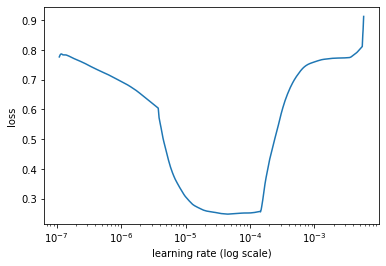

In [63]:
learner.lr_find(show_plot=True)

In [64]:
history = learner.autofit(1e-5, 10, checkpoint_folder='bert_workshop')



begin training using triangular learning rate policy with max lr of 1e-05...
Epoch 1/10
366/366 [==============================] - 267s 676ms/step - loss: 0.3135 - accuracy: 0.8644 - val_loss: 0.1612 - val_accuracy: 0.9467
Epoch 2/10
366/366 [==============================] - 244s 666ms/step - loss: 0.1445 - accuracy: 0.9521 - val_loss: 0.1783 - val_accuracy: 0.9344
Epoch 3/10
366/366 [==============================] - 243s 665ms/step - loss: 0.1038 - accuracy: 0.9671 - val_loss: 0.1778 - val_accuracy: 0.9426
Epoch 4/10
366/366 [==============================] - 243s 665ms/step - loss: 0.0712 - accuracy: 0.9781 - val_loss: 0.1649 - val_accuracy: 0.9426
Epoch 5/10
366/366 [==============================] - 243s 664ms/step - loss: 0.0527 - accuracy: 0.9854 - val_loss: 0.1698 - val_accuracy: 0.9508
Epoch 6/10
366/366 [==============================] - 243s 664ms/step - loss: 0.0592 - accuracy: 0.9854 - val_loss: 0.1968 - val_accuracy: 0.9426
Epoch 7/10
366/366 [=========================

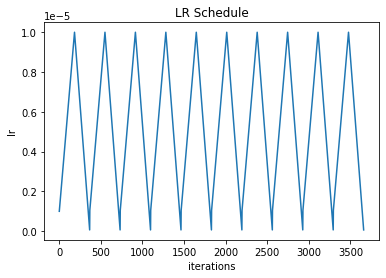

In [65]:
learner.plot('lr')

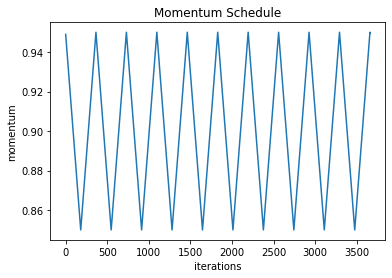

In [66]:
learner.plot('momentum')

In [67]:
h1 = go.Scatter(y=history.history['loss'], 
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=history.history['val_loss'], 
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [68]:
h1 = go.Scatter(y=history.history['accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=history.history['val_accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [69]:
model.load_weights('bert_workshop/weights-01.hdf5')

In [70]:
learner = ktrain.get_learner(model, train_data=(train_X, train_Y),val_data=(val_X, val_Y), batch_size=6)

In [71]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [72]:
cat = predictor.get_classes()
cat

['neg', 'pos']

In [73]:
learner.validate(val_data=(val_X, val_Y), class_names=cat)

8/8 [==============================] - 11s 964ms/step
              precision    recall  f1-score   support

         neg       0.92      0.96      0.94       106
         pos       0.97      0.93      0.95       138

    accuracy                           0.95       244
   macro avg       0.94      0.95      0.95       244
weighted avg       0.95      0.95      0.95       244



array([[102,   4],
       [  9, 129]])

In [74]:
predictor.predict_proba("ฝ้ายจะไม่ทน กับคนนิสัยไม่ดี") 

1/1 [==============================] - 0s 49ms/step


array([0.9503918, 0.0496081], dtype=float32)

In [75]:
predictor.predict("ฝ้ายจะไม่ทน กับคนนิสัยไม่ดี") 

1/1 [==============================] - 0s 50ms/step


'neg'

In [76]:
pretrain_name = 'bert_sentiment'

In [77]:
predictor.save(pretrain_name)

In [78]:
reloaded_predictor = ktrain.load_predictor(pretrain_name)

In [79]:
reloaded_predictor.predict("ฝ้ายจะไม่ทน กับคนนิสัยไม่ดี")

1/1 [==============================] - 4s 4s/step


'neg'

In [80]:
y_true = val_Y

In [81]:
x_pred = val_X
x_pred[:5]

[array([[   101,   1434,  31287, ...,      0,      0,      0],
        [   101,   1450, 111431, ...,      0,      0,      0],
        [   101,   1402,  17344, ...,      0,      0,      0],
        ...,
        [   101,   1434,  20507, ...,      0,      0,      0],
        [   101,   1419,  22765, ...,      0,      0,      0],
        [   101,  15198,    102, ...,      0,      0,      0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [82]:
type(val_X)

list

In [83]:
# preds = reloaded_predictor.predict(x_pred)

In [84]:
# cm = confusion_matrix(y_true, preds)

In [85]:
# df_cm = pd.DataFrame(cm, range(2), range(2))
# plt.figure(figsize=(20,14))
# sn.set(font_scale=1.2) # for label size
# sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}, fmt='g') # for num predict size

# plt.show()

In [86]:
# print(classification_report(y_true, preds, target_names=cat, digits=4))

**BERT model**

Prepare test data

In [87]:
test_df.head()

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments
2748,สแกนใบหน้าไม่ดีระบบควรปรับปรุง,1.0,0.0,11.9.1,2022-11-04 06:45:23,neg,สแกน ใบหน้า ดี ระบบ ปรับปรุง
2694,ใช้งานสะดวกสบาย,5.0,0.0,11.9.1,2022-11-06 17:08:55,pos,ใช้งาน สะดวกสบาย
1931,แย่มาก​ ปรับปรุงไห้ทัน​ค่ายอื่นด้วยค่ะ​,1.0,0.0,0.0.0,2022-10-22 13:27:32,neg,แย่มาก ​ ปรับปรุง ไห้ ​ ค่าย ​
1575,ปิดปรับปรุงบ่อยมากคะแข้ไขั,3.0,0.0,0.0.0,2022-11-09 10:37:38,neg,ปรับปรุง แข้ ไข ั
1934,โหลดไม่ได้,5.0,0.0,3.59.0,2022-10-22 10:12:28,neg,โหลด


In [88]:
x_pred = test_df['content'].to_list()

In [89]:
y_true = test_df['class'].to_list()

In [90]:
preds = reloaded_predictor.predict(x_pred)

20/20 [==============================] - 20s 999ms/step


In [91]:
preds

['neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',


Add prediction value to new column

In [92]:
test_df["predict_class"] = np.array(preds)

test_df.sample(20)

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments,predict_class
2180,โหดๆ,5.0,0.0,3.59.0,2022-10-11 11:05:51,pos,โหด,pos
3267,แอปเป็นไรทำไมเข้าไม่ได้,1.0,0.0,11.9.1,2022-10-20 11:33:00,neg,แอป เป็นไร,neg
1559,ทำไมไดเร็กมาจากแอพ tot ไม่ได้ ชั้นเหนื่อยมากนะ,1.0,0.0,3.60.0,2022-11-10 15:32:48,neg,ได เร็ก มาจาก แอพ tot ชั้น เหนื่อย,neg
3280,ห่วยแตก,1.0,0.0,0.0.0,2022-10-20 11:19:11,neg,ห่วยแตก,neg
1087,ดีมากเลยโอนถอนง่ายไม่ต้องมีเงินสดติดกระเป๋าใช้...,5.0,0.0,5.16.1,2022-10-21 00:27:37,pos,ดีมาก โอน ถอน ไม่ต้อง เงินสด ติด กระเป๋า แอป,pos
3243,app ห่วยแตกมาก แล้วบังคับให้ใช้ จะโอนก็โอนไม่ได้,1.0,1.0,11.9.1,2022-10-20 11:54:22,neg,app ห่วยแตก บังคับ โอน โอน,neg
1854,ดีมากคับ,5.0,0.0,3.60.0,2022-10-26 09:48:16,pos,ดีมาก คับ,pos
1983,ขอสินเชื่อตัวไหนก็ไม่ผ่านเรยค่ะ เป็นลูกค้า มาก...,5.0,0.0,3.60.0,2022-10-20 03:22:18,neg,สินเชื่อ ตัว เรย ลูกค้า 😔,neg
3112,แอพวันนี้เป็นอะไรครับ โอนเงินไม่ได้เลย,1.0,0.0,11.9.1,2022-10-25 07:25:10,neg,แอพ โอน เงิน,neg
2693,เยี่ยม,5.0,0.0,11.9.1,2022-11-06 18:10:36,pos,เยี่ยม,pos


In [93]:
cm_test = confusion_matrix(y_true, preds)

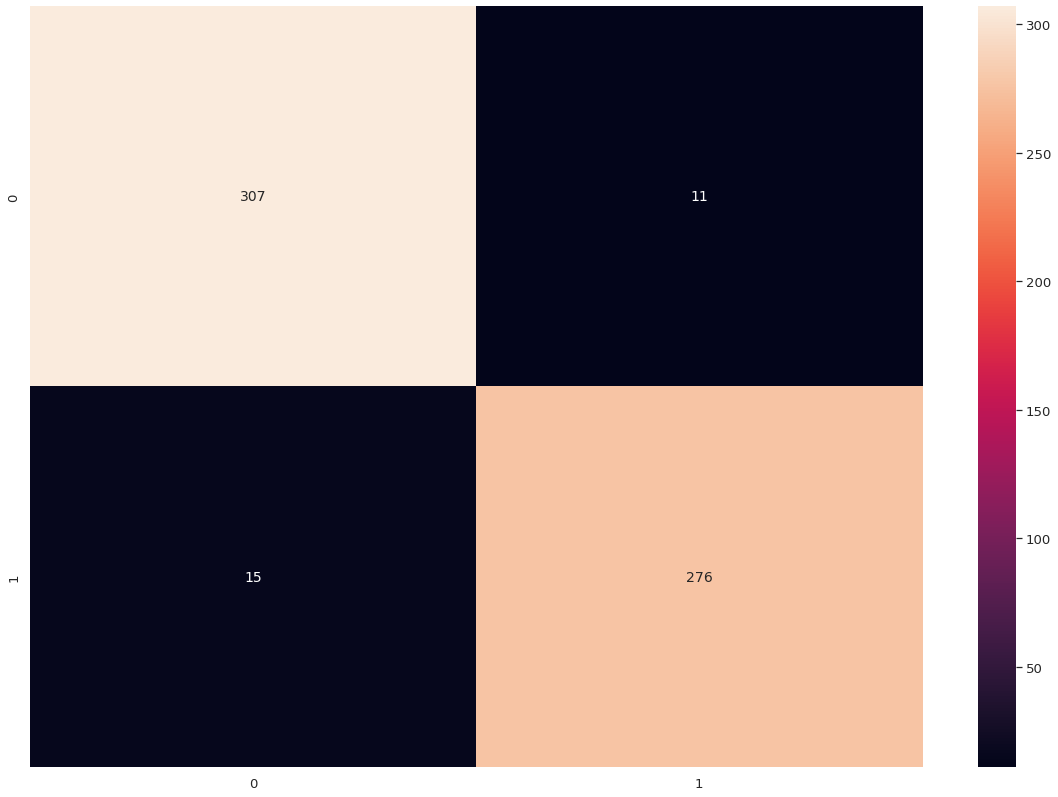

In [94]:
df_cm = pd.DataFrame(cm_test, range(2), range(2))
plt.figure(figsize=(20,14))
sn.set(font_scale=1.2) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}, fmt='g') # for num predict size

plt.show()

In [95]:
classname =['pos','neg']
print(classification_report(y_true, preds, target_names=classname, digits=4))

              precision    recall  f1-score   support

         pos     0.9534    0.9654    0.9594       318
         neg     0.9617    0.9485    0.9550       291

    accuracy                         0.9573       609
   macro avg     0.9575    0.9569    0.9572       609
weighted avg     0.9574    0.9573    0.9573       609



Predict label compare with actual comment score

In [96]:
len(test_df)

609

In [97]:
query = test_df.query("`score` >= 3 and `predict_class` == 'pos'")

len(query)

281

In [98]:
query.sample(20)

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments,predict_class
2781,ดี,4.0,0.0,11.9.1,2022-11-02 19:03:53,pos,ดี,pos
2207,เยี่ยมยอมครับบริการดีมาก,5.0,0.0,3.56.0,2022-10-10 06:10:16,pos,เยี่ยม บริการ ดีมาก,pos
2630,ใช้ดีมากๆค่ะ,5.0,0.0,0.0.0,2022-11-09 14:45:04,pos,ดีมาก,pos
2479,ดี,5.0,0.0,3.59.0,2022-10-02 07:05:38,pos,ดี,pos
1548,ชอบ,5.0,0.0,3.51.0,2022-11-11 04:18:43,pos,ชอบ,pos
174,ใช่ง่ายสะดวก OK. เลยชอบ,5.0,0.0,5.16.3,2022-11-09 07:01:18,pos,สะดวก ok ชอบ,pos
2357,ดีขึ้นกว่าเดิมเยอะไม่ค้างแล้ว,5.0,0.0,3.59.0,2022-10-06 04:37:17,pos,ดีขึ้น เดิม ค้าง,pos
3334,ดีมากคะ,5.0,0.0,11.9.1,2022-10-18 20:37:12,pos,ดีมาก,pos
3382,ดีมากคับ,4.0,0.0,11.9.1,2022-10-17 04:46:20,pos,ดีมาก คับ,pos
1399,Good,5.0,0.0,5.16.1,2022-10-15 02:38:40,pos,good,pos


In [99]:
query = test_df.query("`score` < 3 and `predict_class` == 'neg'")

len(query)

239

In [100]:
query.sample(20)

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments,predict_class
789,แอพล่มบ่อยเกิน,1.0,0.0,5.16.1,2022-10-28 12:06:40,neg,แอพ ล่ม,neg
1935,ไส่รหัสถูกยังเข้าไม่ได้ แย่มาก,1.0,1.0,0.0.0,2022-10-22 09:50:04,neg,ไส่ รหัส แย่มาก,neg
305,กดเข้าไม่ได้เลย กดเข้าเด้งออกอย่างเดียว เคลียร...,2.0,3.0,5.16.2,2022-11-06 13:36:38,neg,กด กด เด้ง เคลียร์ แอฟ เครื่อง,neg
3078,ห่วย,1.0,0.0,0.0.0,2022-10-25 08:01:41,neg,ห่วย,neg
2243,แย่มาก อัปเดตบ่อยไป !!,1.0,0.0,3.54.0,2022-10-09 00:36:36,neg,แย่มาก อัปเดต !!,neg
3264,แย่มากอัพเดตมาคิดว่าจะไม่ต้องมีปิดปรังปรุงบ่อย...,2.0,3.0,11.9.1,2022-10-20 11:35:32,neg,แย่มาก อัพเดต ไม่ต้อง ปรัง ปรุง ปรัง ปรุง แจ้ง...,neg
2989,มันจะล่มอะไรหนักหนา,1.0,0.0,11.9.1,2022-10-26 05:30:46,neg,ล่ม หนักหนา,neg
1197,ผิดหวังมาก แอปใช้ยากมากเลยนะมันชอบค้างตลอด โหล...,1.0,2.0,5.16.1,2022-10-18 15:02:43,neg,ผิดหวัง แอป ชอบ ค้าง โหลด หน้า เน็ต ปกติ,neg
2112,สมัครยากมาก,1.0,0.0,3.59.0,2022-10-14 06:06:34,neg,สมัคร,neg
3267,แอปเป็นไรทำไมเข้าไม่ได้,1.0,0.0,11.9.1,2022-10-20 11:33:00,neg,แอป เป็นไร,neg


In [101]:
query = test_df.query("`score` >= 3 and `predict_class` != 'pos'")

len(query)

83

In [102]:
query.sample(20)

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments,predict_class
2104,เวลาupdateทำไมช้ามาก,3.0,0.0,3.54.0,2022-10-14 11:46:51,neg,เวลา update,neg
771,ปัจจุบันนี้ เวลาลบออกแล้วติดตั้งใหม่ ใช้เวลานา...,5.0,0.0,5.15.5,2022-10-29 00:03:38,neg,ปัจจุบันนี้ เวลา ลบ ติด ตั้งใหม่ ใช้เวลานาน,neg
818,ทำไม เปิดแอป เพื่อโอนเงินใช้ไม่ได้ ตอนนี้อยู่ต...,5.0,1.0,5.16.1,2022-10-27 15:46:51,neg,แอป โอน เงิน ใช้ไม่ได้ ตอนนี้ ต่างประเทศ...,neg
1504,โอเค,5.0,0.0,3.60.0,2022-11-12 12:59:54,neg,โอเค,neg
1208,แอปถูกล็อคเนื่องจากจำรหัสผ่านไม่ได้ต่องทำไงดีครับ,3.0,0.0,0.0.0,2022-10-18 12:22:52,neg,แอป ล็อค รหัสผ่าน ง ทำ ดี,neg
2193,แอฟธนาคานไทยพานิตชอบมีปัญหามาก,5.0,0.0,3.59.0,2022-10-10 22:19:26,neg,แอฟ ธนาคาน ไทยพานิต ชอบ มีปัญหา,neg
2285,ทำไมต้องปรับปรุงบ่อยๆๆด้วยค่ะ,5.0,0.0,3.53.0,2022-10-08 02:33:32,neg,ปรับปรุง,neg
1337,สมัครได้แล้วใช้เบอร์เดิมที่ลงทะเบียน แล้ว สมัค...,5.0,0.0,5.16.1,2022-10-16 12:20:23,pos,สมัคร เบอร์ เดิม ลงทะเบียน สมัคร,neg
1443,กรอกข้อมูลครบแล้วแต่ทำไมบอกข้อมูลบัตรประชาชนถึ...,3.0,2.0,5.16.1,2022-10-14 03:26:31,neg,กรอก ข้อมูล ข้อมูล บัตรประชาชน ข้อมูล ตอนที่ ส...,neg
1748,โหลดข้อมูลนานไปและ ให้ลค. มีทางเลือกกับเงื่อน ...,4.0,0.0,3.56.0,2022-10-31 11:00:11,neg,โหลด ข้อมูล ลค ทางเลือก เงื่อน แบ้ งค์ ...,neg


In [103]:
query = test_df.query("`score` < 3 and `predict_class` != 'neg'")

len(query)

6

In [104]:
query

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments,predict_class
2881,ใช่ดีครับแอปกรุงไทยแต่ผมเข้าไม่ได้3เดือนแล้ว,2.0,0.0,0.0.0,2022-10-30 06:02:08,neg,ดี แอป กรุงไทย ผม 3 เดือน,pos
728,ดีค่ะ,1.0,0.0,5.16.1,2022-10-30 01:08:57,pos,ดี,pos
2531,ปิดถึงกี่​โมง​ครับท่าน,2.0,0.0,3.56.0,2022-09-30 10:37:42,neg,กี่ ​ โมง ​ ท่าน,pos
209,ใช้งานช้ามากเงียบบางทีก็ค้าง,1.0,0.0,5.16.3,2022-11-08 13:39:29,neg,ใช้งาน เงียบ ค้าง,pos
343,ดีมากแต่ว่าตอนนี้ทำไมถึงเข้าแอปไม่ได้ไม่รุ้ครับ,1.0,0.0,5.16.2,2022-11-06 03:47:01,neg,ดีมาก ตอนนี้ แอป รุ้,pos
1251,มีบัคควรแก้ไขด่วนนนน เปิด ปิดเองวันละ4-5รอบ,2.0,0.0,5.16.1,2022-10-18 02:35:29,neg,บัค ด่วน นนน 45 รอบ,pos


Predict label compare with actual label

In [105]:
query = test_df.query("`class` == 'pos' and `predict_class` == 'pos'")

len(query)

276

In [106]:
query.sample(20)

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments,predict_class
3469,สะดวกสะบาย พึ่งพอใจในความสะดวกทุกด้าน,5.0,0.0,11.1.5,2022-10-13 11:27:39,pos,สะดวก สะ บาย พอใจ ความสะดวก,pos
1275,ดี,5.0,0.0,5.16.1,2022-10-17 14:03:38,pos,ดี,pos
1783,สะดวกดีมากคับ,5.0,0.0,3.60.0,2022-10-30 00:26:12,pos,สะดวก ดีมาก คับ,pos
3138,ดีครับ,4.0,0.0,11.9.1,2022-10-24 16:10:28,pos,ดี,pos
2650,ดี,5.0,0.0,11.9.1,2022-11-09 02:43:31,pos,ดี,pos
2053,ดีๆๆๆๆๆ,5.0,0.0,3.52.0,2022-10-17 03:14:45,pos,ดี ๆๆๆๆๆ,pos
407,ดีเยี่ยม,5.0,0.0,5.16.1,2022-11-05 08:10:48,pos,ดีเยี่ยม,pos
119,ดีมากคะ,4.0,0.0,5.16.3,2022-11-10 06:09:13,pos,ดีมาก,pos
186,ดีคับ,5.0,0.0,5.16.1,2022-11-09 03:14:45,pos,ดี คับ,pos
1797,สะดวกสบายมากค่ะ,5.0,0.0,3.60.0,2022-10-29 04:44:16,pos,สะดวกสบาย,pos


In [107]:
query = test_df.query("`class` == 'neg' and `predict_class` == 'neg'")

len(query)

307

In [108]:
query.sample(20)

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments,predict_class
3345,แอพแย่มาก ทำรายการถึงตอนสแกนหน้าแล้วค้างให้ดูค...,1.0,0.0,11.9.1,2022-10-18 07:19:41,neg,แอพ แย่มาก ทำ รายการ ตอน สแกน หน้า ค้าง ดู ค...,neg
756,ช้ามากกว่าจะเข้าได้,1.0,0.0,0.0.0,2022-10-29 09:05:16,neg,,neg
789,แอพล่มบ่อยเกิน,1.0,0.0,5.16.1,2022-10-28 12:06:40,neg,แอพ ล่ม,neg
3111,Appโคตรห่วย,1.0,0.0,11.9.1,2022-10-25 07:28:58,neg,app โคตร ห่วย,neg
2315,ทำไมแอพอัพเดท/ปรับปรุงบ่อยจังครับ มีเรื่องใช้เ...,1.0,0.0,3.59.0,2022-10-07 18:21:06,neg,แอพ อัพเดท / ปรับปรุง มีเรื่อง เงิน กด,neg
1637,อัปเดตหลายรอบล่ะยังใช้ไม่ได้เลย,1.0,0.0,3.54.0,2022-11-05 00:38:56,neg,อัปเดต รอบ ล่ะ ใช้ไม่ได้,neg
3067,แอฟใช้งานไม่ได้ โอนเงินเข้าไปแล้วเงินไม่เข้าบั...,1.0,1.0,11.9.1,2022-10-25 08:17:02,neg,แอฟ ใช้งาน โอน เงิน เข้าไป เงิน เข้าบัญชี ...,neg
2637,เสียการทรงตัวบ่อย,3.0,0.0,11.9.1,2022-11-09 10:38:44,neg,การทรงตัว,neg
1144,ห่วยมาก ตอนแรกเข้าแอปไม่ได้ ตอนนี้ต้องมานั่งสม...,1.0,0.0,0.0.0,2022-10-19 15:24:50,neg,ห่วย ตอนแรก แอป ตอนนี้ นั่ง สมัคร บัญชี ...,neg
973,เข้าธนาคารตัวเองไม่ได้,2.0,0.0,5.16.1,2022-10-23 16:36:16,neg,ธนาคาร ตัวเอง,neg


In [109]:
query = test_df.query("`class` == 'pos' and `predict_class` != 'pos'")

len(query)

15

In [110]:
query

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments,predict_class
2012,ไม่มีปัญหาอะไรนะ บ่นกันไปเอง,5.0,0.0,3.59.0,2022-10-18 15:43:11,pos,มีปัญหา บ่น,neg
1337,สมัครได้แล้วใช้เบอร์เดิมที่ลงทะเบียน แล้ว สมัค...,5.0,0.0,5.16.1,2022-10-16 12:20:23,pos,สมัคร เบอร์ เดิม ลงทะเบียน สมัคร,neg
2475,ผ่านครับจัดว่าเด่ด,5.0,0.0,3.59.0,2022-10-02 08:35:22,pos,เด่ ด,neg
3303,ทำไมเปิดหน้าสมุดบัญชีไม่ได้,1.0,0.0,0.0.0,2022-10-20 04:06:45,pos,หน้า สมุดบัญชี,neg
3343,แอพนี้ดีทุกอย่างค่ะ ทำให้สะดวกในการใช้จ่ายเงิน...,5.0,0.0,10.13.1,2022-10-18 07:40:35,pos,แอพ ดี สะดวก ใช้จ่าย เงิน ข้อมูล ล่ม ตอน ด...,neg
1372,โอเค,4.0,0.0,5.16.0,2022-10-15 15:13:52,pos,โอเค,neg
1312,เครเลย,5.0,0.0,5.16.1,2022-10-17 02:54:30,pos,เค ร,neg
1835,ขอบคุณscd ที่ทำเข้าถึงสินเชื่ออย่างง่ายดาย ไม่...,5.0,0.0,3.60.0,2022-10-27 04:55:45,pos,ขอบคุณ scd ทำ เข้าถึง สินเชื่อ ง่ายดาย ไม่...,neg
312,app มันต้องมี,5.0,0.0,5.16.2,2022-11-06 11:32:11,pos,app,neg
49,ถ้าบัญชีอยู่อีกเครื่องเราต้องการเข้าเครื่องใหม...,4.0,0.0,0.0.0,2022-11-11 12:50:04,pos,บัญชี เครื่อง ต้องการ เข้าเครื่อง ทำ ไว คับ,neg


In [111]:
query = test_df.query("`class` == 'neg' and `predict_class` != 'neg'")

len(query)

11

In [112]:
query

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments,predict_class
2881,ใช่ดีครับแอปกรุงไทยแต่ผมเข้าไม่ได้3เดือนแล้ว,2.0,0.0,0.0.0,2022-10-30 06:02:08,neg,ดี แอป กรุงไทย ผม 3 เดือน,pos
258,ต้องการใช้ค่ะ,5.0,0.0,5.16.3,2022-11-07 11:54:40,neg,ต้องการ,pos
288,เงินในระบบธนาคารช้ามาก,5.0,0.0,5.16.1,2022-11-06 23:30:48,neg,เงิน ระบบ ธนาคาร,pos
241,อยากมีตังค์ครับ,5.0,0.0,5.16.3,2022-11-07 20:28:08,neg,ตังค์,pos
2531,ปิดถึงกี่​โมง​ครับท่าน,2.0,0.0,3.56.0,2022-09-30 10:37:42,neg,กี่ ​ โมง ​ ท่าน,pos
209,ใช้งานช้ามากเงียบบางทีก็ค้าง,1.0,0.0,5.16.3,2022-11-08 13:39:29,neg,ใช้งาน เงียบ ค้าง,pos
1029,ดีงับแค่เวลาสมัครในแอปใช้เวลานิดนึงงับ,5.0,0.0,5.16.1,2022-10-22 03:52:38,neg,ดี งับ เวลา สมัคร แอป ใช้เวลา นิดนึง งับ,pos
343,ดีมากแต่ว่าตอนนี้ทำไมถึงเข้าแอปไม่ได้ไม่รุ้ครับ,1.0,0.0,5.16.2,2022-11-06 03:47:01,neg,ดีมาก ตอนนี้ แอป รุ้,pos
1089,ดีมากคับ. แต่แอปเด้งออกจากโทรศัพท์เอาเข้าให้หน...,5.0,1.0,5.16.1,2022-10-20 23:05:55,neg,ดีมาก คับ แอป เด้ง ออกจาก โทรศัพท์ เข้าให้ คับ,pos
393,ดูก่อน,4.0,0.0,5.16.1,2022-11-05 11:02:06,neg,ดูก่อน,pos


Word cloud - positive comment

In [113]:
query_pos = test_df.query("`class` == 'pos' and `predict_class` == 'pos'")

from wordcloud import WordCloud
text = " ".join(i for i in test_df.clean_comments)
stop_words = ["ดีมาก", "ดี", "ห่วย","ห่วยแตก","โคตรห่วย","แย่มาก","แย่","แย่จัง","กาก","ล่ม","ระบบล่ม","ปรับปรุง",
              "แอพพลิเคชันล่ม","แอปพลิเคชันล่ม","แอปพลิเคชันมีปัญหา","แอปพลิเคชันแย่มาก","แอปพลิเคชันเด้ง","ยุ่งยาก",
              "ลบติดตั้งใหม่","ล้ม","ใช้ไม่ได้","มีปัญหา","เด้ง","เสียเวลา","อัปเดตห่วย","ดีคับ","ok","good"
              "เยี่ยม","ดีมากคับ","app","แอปพลิเคชัน","แอพ","แอป","ชอบ","เดือน","ใช้งาน","เยี่ยม",
              "โคตร","ห่วย","แอฟ","แอปล่ม"] + th_stop_words
regexp = r"[ก-๙a-zA-Z']+"
wordcloud = WordCloud(
                      font_path="/content/THSarabunNew.ttf", 
                      relative_scaling = 0.3,
                      min_font_size=1,
                      background_color="white",
                      width=1024,
                      height=768,
                      max_words=2000, 
                      #mask=mask,
                      colormap='plasma', 
                      scale=3,
                      font_step=4,
                      contour_width=3, 
                      contour_color='steelblue', 
                      collocations=False,
                      regexp=regexp,
                      margin=2,
                      stopwords = stop_words
                      ).generate(text)

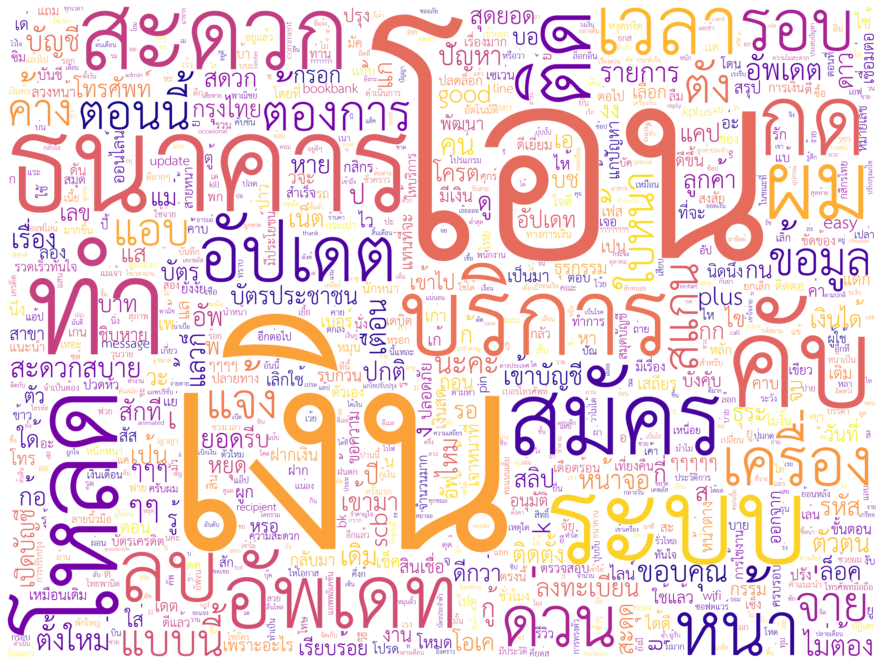

In [114]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

In [115]:
print(wordcloud.words_.keys())

dict_keys(['เงิน', 'โอน', 'ธนาคาร', 'ทำ', 'คับ', 'ระบบ', 'โหลด', 'บริการ', 'สะดวก', 'สมัคร', 'กด', 'ผม', 'อัพเดท', 'ติด', 'ลบ', 'เวลา', 'อัปเดต', 'หน้า', 'ด่วน', 'รอบ', 'เครื่อง', 'ต้องการ', 'สแกน', 'ตอนนี้', 'จ่าย', 'ตัง', 'แจ้ง', 'ข้อมูล', 'ค้าง', 'แอบ', 'ใบหน้า', 'แบบนี้', 'ขอบคุณ', 'อัพเดต', 'เ', 'นะคะ', 'คน', 'ตั้งใหม่', 'บัญชี', 'เตือน', 'ไม่ต้อง', 'ๆๆ', 'สะดวกสบาย', 'ง', 'รายการ', 'อัพ', 'ยอด', 'แล้วก็', 'ป', 'ปัญหา', 'เดิม', 'เรื่อง', 'กู้', 'ตัวตน', 'ดู', 'หน้าจอ', 'good', 'k', 'plus', 'หาย', 'ปกติ', 'ส', 'ติดตั้ง', 'ล็อค', 'เป้น', 'ลงทะเบียน', 'ก้อ', 'เข้ามา', 'เข้าบัญชี', 'ดาว', 'รหัส', 'ลูกค้า', 'ไหม', 'สดวก', 'แก้', 'เน็ต', 'สักที', 'ปี', 'กี่', 'งง', 'สะดุด', 'บัตรประชาชน', 'เงินได้', 'โทรศัพท์', 'พ', 'ใด้', 'โครต', 'รีบ', 'รอ', 'บัตร', 'กก', 'scb', 'เปิดบัญชี', 'สุดยอด', 'ดีกว่า', 'กรุงไทย', 'ธุระ', 'แม่', 'บช', 'แคป', 'โอเค', 'แส', 'กน', 'ก้', 'บาท', 'ยุ', 'เอ', 'สลิป', 'ไข', 'ๆๆๆ', 'รู้', 'หยุด', 'ว่ะ', 'กรอก', 'เลข', 'อัปเดท', 'บอ', 'เรียบร้อย', 'อัฟ', 'ตัว', 'ถอน', '

Word cloud - negative comment

In [116]:
query_neg = test_df.query("`class` == 'neg' and `predict_class` == 'neg'")


text = " ".join(i for i in test_df.clean_comments)
stop_words = ["ดีมากคับ","ดี","ดีมาก","ดีคับ","เยี่ยม","แย่มาก","แย่่","Good","ok","ห่วย","ห่วยแตก",
              "แย่","ได้ดี","ชอบ","app","แอปพลิเคชัน","ปรับปรุง","แอพ","แอป","แอฟ"] + th_stop_words
regexp = r"[ก-๙a-zA-Z']+"
wordcloud = WordCloud(
                      font_path="/content/THSarabunNew.ttf", 
                      relative_scaling = 0.3,
                      min_font_size=1,
                      background_color="white",
                      width=1024,
                      height=768,
                      max_words=2000, 
                      #mask=mask,
                      colormap='plasma', 
                      scale=3,
                      font_step=4,
                      contour_width=3, 
                      contour_color='steelblue', 
                      collocations=False,
                      regexp=regexp,
                      margin=2,
                      stopwords = stop_words
                      ).generate(text)

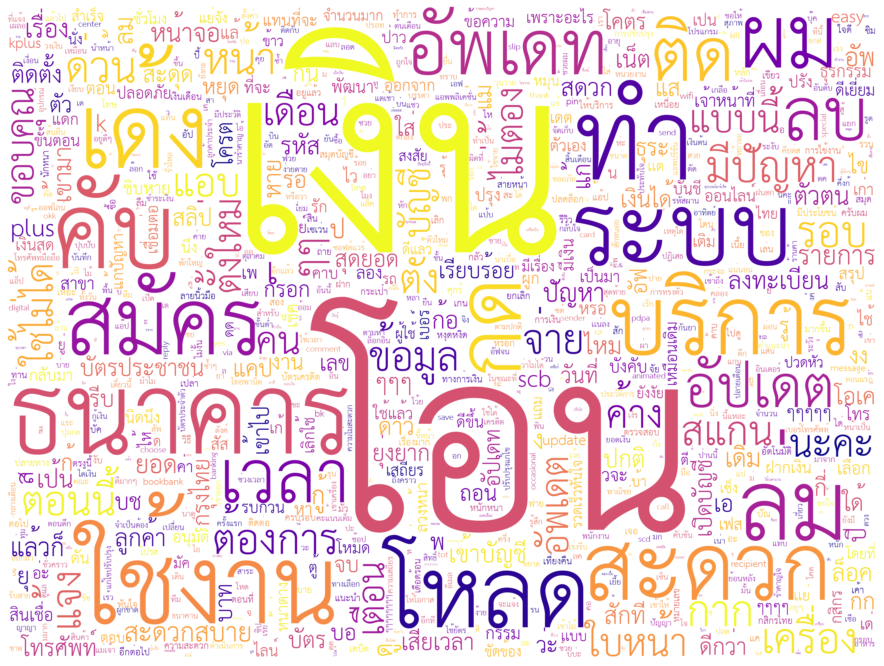

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

In [118]:
print(wordcloud.words_.keys())

dict_keys(['เงิน', 'โอน', 'ธนาคาร', 'ทำ', 'ใช้งาน', 'คับ', 'เด้ง', 'ระบบ', 'โหลด', 'ล่ม', 'บริการ', 'สะดวก', 'สมัคร', 'กด', 'ผม', 'อัพเดท', 'ติด', 'ลบ', 'เวลา', 'อัปเดต', 'มีปัญหา', 'หน้า', 'ด่วน', 'กาก', 'รอบ', 'เครื่อง', 'ต้องการ', 'สแกน', 'ตอนนี้', 'จ่าย', 'ตัง', 'แจ้ง', 'ข้อมูล', 'ค้าง', 'แอบ', 'ใบหน้า', 'แบบนี้', 'ขอบคุณ', 'อัพเดต', 'เ', 'นะคะ', 'คน', 'เดือน', 'ตั้งใหม่', 'บัญชี', 'ใช้ไม่ได้', 'เตือน', 'ไม่ต้อง', 'ๆๆ', 'สะดวกสบาย', 'ง', 'รายการ', 'อัพ', 'ยอด', 'แล้วก็', 'ป', 'ปัญหา', 'ล้ม', 'เดิม', 'เรื่อง', 'กู้', 'ตัวตน', 'ดู', 'หน้าจอ', 'k', 'plus', 'หาย', 'ปกติ', 'ส', 'ติดตั้ง', 'ล็อค', 'เป้น', 'ลงทะเบียน', 'ก้อ', 'เข้ามา', 'เข้าบัญชี', 'ดาว', 'รหัส', 'ลูกค้า', 'ไหม', 'สดวก', 'แก้', 'เน็ต', 'สักที', 'ปี', 'กี่', 'งง', 'สะดุด', 'บัตรประชาชน', 'เงินได้', 'โทรศัพท์', 'พ', 'ใด้', 'โครต', 'รีบ', 'รอ', 'บัตร', 'กก', 'scb', 'เปิดบัญชี', 'เสียเวลา', 'สุดยอด', 'ยุ่งยาก', 'ดีกว่า', 'กรุงไทย', 'ธุระ', 'แม่', 'บช', 'แคป', 'โอเค', 'แส', 'กน', 'ก้', 'บาท', 'ยุ', 'เอ', 'สลิป', 'ไข', 'ๆๆๆ', '